<a href="https://colab.research.google.com/github/Ashu598/ANN-Basic-Customer-Churn-Prediction/blob/main/ANN_Basic_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


- For churn perdiction, Cols: RowNumber, CustomerId, Surname are not required so we'll drop these cols

In [5]:
df = df.drop(columns = ['CustomerId','RowNumber', 'Surname'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


- There are no missing value in any col
- All the datatypes look correct

In [7]:
#Check Duplicates
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


- 2037 people left the org but 7963 are still using the product

In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


### Now we have to encode Geography and Gender Cols

In [10]:
#Create new Cols for every unique values in the Geography and Gender Cols
df = pd.get_dummies(df, columns = ['Geography','Gender'], drop_first = True)

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


- Three new Cols (Geography_Germany	Geography_Spain	Gender_Male) have been created but they have been assigned values in Bool Type. We'll convert it into Int

In [12]:
df['Geography_Germany'] = df['Geography_Germany'].astype(int)

In [13]:
df['Geography_Spain'] = df['Geography_Spain'].astype(int)

In [14]:
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


###  Now we'll split our data in train test

In [16]:
x = df.drop(columns = ['Exited'])
y = df['Exited']

In [17]:
print(x.shape)
print(y.shape)

(10000, 11)
(10000,)


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
print(x_train.shape)
print(y_train.shape)

(8000, 11)
(8000,)


In [20]:
#Scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
x_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
#shape of x train
x_train_scaled.shape

(8000, 11)

In [25]:
model = Sequential()

In [26]:
model.add(Dense(3, activation = 'relu', input_dim = 11)) #There are 11 input cols in the input data
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- In this model a data set with 11 input features has been given to a Hidden layer which contrains 3 nodes [No. of parameters = weights(11*3)+bias(3)] ie 36.
- The output will be given to the output layer that contains 1 node [No. of parameters = weights(3*1) + bias(1)] ie 4.
- Total No. of trainable parameters = 36+4 = 40.

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [29]:
model_history = model.fit(x_train_scaled, y_train, epochs = 15)
#We will get a Dictionary name model_history, it will help in plotting graphs
#to check the perormance of the neural network at any step

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6449 - loss: 0.6877
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7846 - loss: 0.5233
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8020 - loss: 0.4648
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4588
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8089 - loss: 0.4386
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8099 - loss: 0.4297
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8178 - loss: 0.4246
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8246 - loss: 0.4168
Epoch 9/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8167 - loss: 0.4285
Epoch 10/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8317 - loss: 0.4036
Epoch 11/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.4215
Epoch 12/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

### Find Weights and Biases of the Model

In [30]:

model.layers[0].get_weights()

[array([[ 3.4920350e-02, -1.1672837e-01,  3.6080688e-04],
        [ 1.0698638e-01,  3.5625222e-01, -1.1222225e+00],
        [ 3.2942221e-02, -2.6712206e-01, -1.2092493e-01],
        [-3.4276232e-01, -2.9091227e-01, -6.1761335e-02],
        [-6.6000652e-03, -6.9286752e-01, -7.5648993e-02],
        [ 3.1649150e-02, -8.2161808e-03, -4.3277480e-02],
        [ 8.7636477e-01, -5.0108159e-01, -2.5246942e-01],
        [-1.2541193e-01, -4.0839523e-02,  3.0725624e-02],
        [-4.6342334e-01,  3.5746664e-01, -1.6451020e-02],
        [-1.4330745e-01, -4.5017429e-02, -1.7620036e-02],
        [ 4.4192380e-01, -1.3942398e-01,  6.9223349e-03]], dtype=float32),
 array([ 0.7498542 , -0.02246297,  0.98374337], dtype=float32)]

- These are the weights and biases of the first layer [weights(11*3)+bias(3)] ie 36]

In [31]:
model.layers[0].get_weights()[0]

array([[ 3.4920350e-02, -1.1672837e-01,  3.6080688e-04],
       [ 1.0698638e-01,  3.5625222e-01, -1.1222225e+00],
       [ 3.2942221e-02, -2.6712206e-01, -1.2092493e-01],
       [-3.4276232e-01, -2.9091227e-01, -6.1761335e-02],
       [-6.6000652e-03, -6.9286752e-01, -7.5648993e-02],
       [ 3.1649150e-02, -8.2161808e-03, -4.3277480e-02],
       [ 8.7636477e-01, -5.0108159e-01, -2.5246942e-01],
       [-1.2541193e-01, -4.0839523e-02,  3.0725624e-02],
       [-4.6342334e-01,  3.5746664e-01, -1.6451020e-02],
       [-1.4330745e-01, -4.5017429e-02, -1.7620036e-02],
       [ 4.4192380e-01, -1.3942398e-01,  6.9223349e-03]], dtype=float32)

- Weights of the 11 inputs and one layer with 3 nodes (11*3)

In [32]:
model.layers[0].get_weights()[1]

array([ 0.7498542 , -0.02246297,  0.98374337], dtype=float32)

- Biases of first layer with 3 nodes

In [33]:
model.layers[1].get_weights()

[array([[-0.636675 ],
        [ 0.7816751],
        [-1.0017465]], dtype=float32),
 array([-0.21828732], dtype=float32)]

- 3 Weights and 1 Bias of the first layer and Output layer [weights(3*1) + bias(1)] ie 4.

In [34]:
print("="*80)
print("Weights of the first layer and output layer [weights(3*1)] ie 3")
print(model.layers[1].get_weights()[0])
print("="*80)
print("1 Bias of the Output layer")
print(model.layers[1].get_weights()[1])
print("="*80)

Weights of the first layer and output layer [weights(3*1)] ie 3
[[-0.636675 ]
 [ 0.7816751]
 [-1.0017465]]
1 Bias of the Output layer
[-0.21828732]


### Model Prediction and Accuracy

In [35]:
y_pred = model.predict(x_test_scaled)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.13076784],
       [0.08105919],
       [0.3775201 ],
       ...,
       [0.56859934],
       [0.06694613],
       [0.24932656]], dtype=float32)

- Since we have used Sigmoid Activation fun, the result is in probabilities instead of 0 and 1.
- We have decided a threshold of 0.5 to divide the probabilities into 0 and 1.

In [36]:
y_pred_new = np.where(y_pred>0.5,1,0)
y_pred_new

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, y_pred_new)

0.836

- We have got accuracy of almost 83%, we can improve the accuracy by changing activation function, adding more layers, adding more nodes in the layers, increasing number of epochs

### Find Model History

In [39]:
import matplotlib.pyplot as plt

In [40]:
model_history.history

{'accuracy': [0.6966249942779541,
  0.7927500009536743,
  0.8015000224113464,
  0.8033750057220459,
  0.8058750033378601,
  0.809499979019165,
  0.8138750195503235,
  0.8183749914169312,
  0.8208749890327454,
  0.8241249918937683,
  0.827875018119812,
  0.8298749923706055,
  0.831125020980835,
  0.8306249976158142,
  0.8326249718666077],
 'loss': [0.6269772052764893,
  0.5039954781532288,
  0.4665938913822174,
  0.44950658082962036,
  0.4399532973766327,
  0.43401554226875305,
  0.4296252131462097,
  0.4259972870349884,
  0.42269831895828247,
  0.4196181893348694,
  0.4165650010108948,
  0.41334283351898193,
  0.41031479835510254,
  0.4072067439556122,
  0.4040745198726654]}

- It's a Dictionary of Key, Value Pairs for 2 Keys: accuracy and loss
- For every epochs (here 15), accuracy and loss has been given

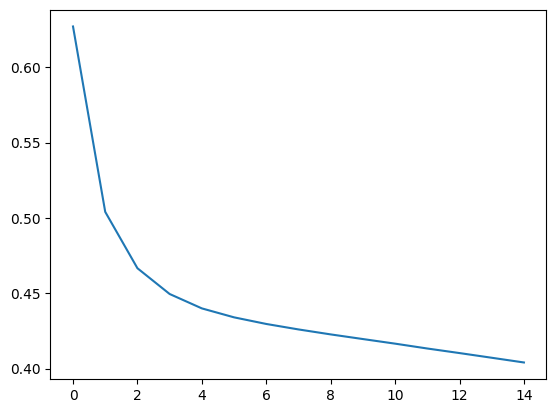

In [41]:
plt.plot(model_history.history['loss'])

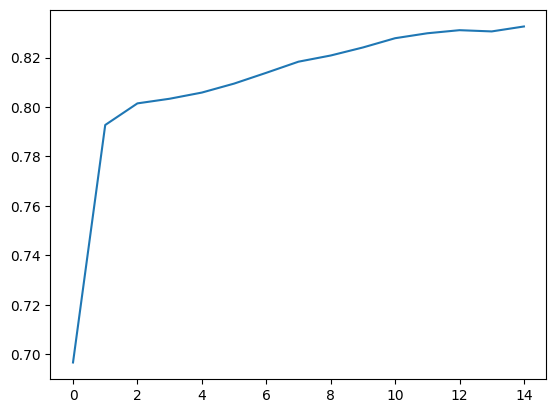

In [42]:
plt.plot(model_history.history['accuracy'])